In [150]:
!ls

Activities-Chapter-4.ipynb     austin_weather-Copy1.csv
Chapter-4 Autoregression.ipynb spx-Copy1.csv


In [151]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [152]:
df = pd.read_csv('spx-Copy1.csv')
df['date']= pd.to_datetime(df.date)

In [153]:
df.head()

,date,close
0,1986-01-02,209.59
1,1986-01-03,210.88
2,1986-01-06,210.65
3,1986-01-07,213.80
4,1986-01-08,207.97


In [154]:
df.isnull().sum()

date     0
close    0
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8192 non-null   datetime64[ns]
 1   close   8192 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.1 KB


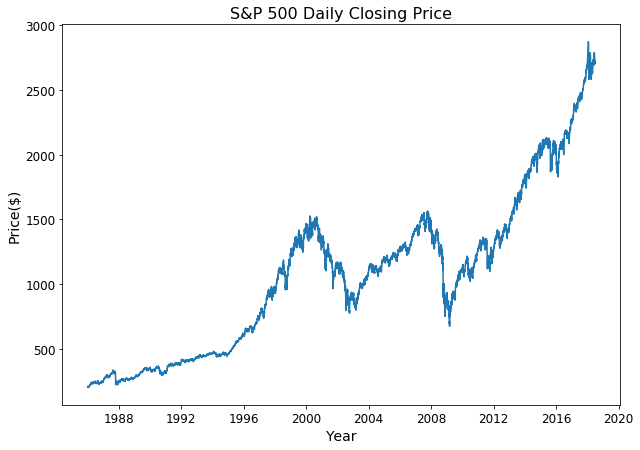

In [156]:
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(df.date,df.close)
ax.set_title('S&P 500 Daily Closing Price',fontsize=16)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Price($)',fontsize=14)
ax.tick_params(axis='both',labelsize=12)
plt.show()

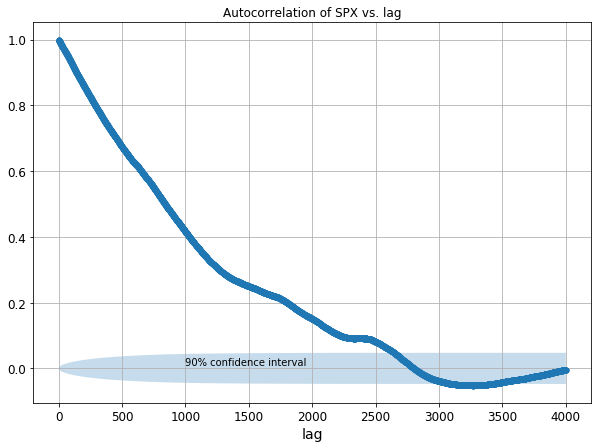

In [157]:
max_lag = 4000
fig,ax = plt.subplots(figsize=(10,7))
acf_plot = plot_acf(x=df.close,
                    ax=ax,
                    lags = max_lag,
                    use_vlines=False,
                    alpha =0.9,
                    title='Autocorrelation of SPX vs. lag'
                   )
ax.grid(True)
ax.text(1000,0.01,'90% confidence interval')
ax.set_xlabel('lag',fontsize=14)
ax.tick_params(axis='both',labelsize=12)
plt.show()

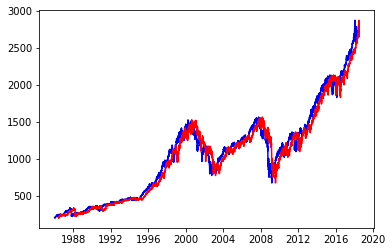

<Figure size 720x504 with 0 Axes>

In [158]:
spx_shift_100= df.copy()
spx_shift_100['close']=df.close.shift(100)
fig,ax = plt.subplots()
fig= plt.figure(figsize=(10,7))
ax.plot(df.date,df.close,c='blue')
ax.plot(spx_shift_100.date,spx_shift_100.close,c='red')
plt.show()

In [159]:
print(spx_shift_100.head(),'\n',spx_shift_100.tail())

        date  close
0 1986-01-02    NaN
1 1986-01-03    NaN
2 1986-01-06    NaN
3 1986-01-07    NaN
4 1986-01-08    NaN 
            date    close
8187 2018-06-25  2823.81
8188 2018-06-26  2821.98
8189 2018-06-27  2762.13
8190 2018-06-28  2648.94
8191 2018-06-29  2695.14


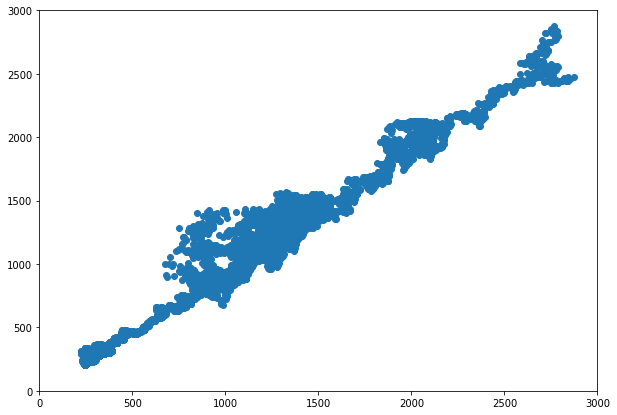

In [160]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(df.loc[100:,'close'],spx_shift_100.loc[100:,'close'])
ax.set_xlim(0,3000)
ax.set_ylim(0,3000)
plt.show()

In [161]:
corr0= np.correlate(df.close[0:]-df.close.mean(), 
                    df.close[0:]-df.close.mean(),
                    mode='valid'
                   )
corrs = [np.correlate(df.close[0:(df.close.shape[0]-i)] -
                     df.close.mean(),
                     df.close[i:]-df.close.mean(),
                     mode='valid'
                    ) for i in range(max_lag)]/corr0

In [162]:
def plot_lag_grid(n_rows,n_cols,max_lag,num_plots,series,corrs,axis_min,axis_max):
    lag_step=int(max_lag/num_plots)
    fig = plt.figure(figsize=(10,7))
    for i in range(num_plots):
        lag_per_plot = lag_step*i
        corr = corrs[lag_per_plot]
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        ax.scatter(series, series.shift(lag_per_plot))
        ax.set_xlim(axis_min,axis_max)
        ax.set_ylim(axis_min,axis_max)
        ax.set_title('lag='+str(lag_per_plot))
        ax.text(axis_min+0.05*(axis_max-axis_min),axis_max-0.05*(axis_max-axis_min), 'correlation='+str(round(corr[0],3)))
    fig.tight_layout()
    plt.show()

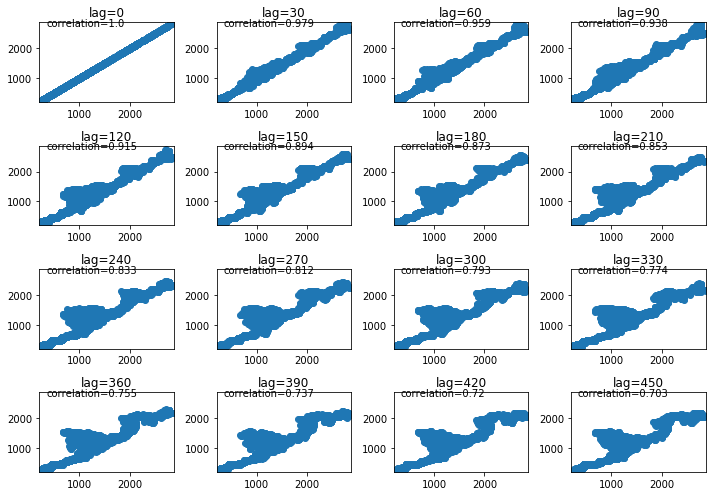

In [163]:
plot_lag_grid(series=df.close,n_rows=4,n_cols=4,max_lag=480,num_plots=16,corrs=corrs,axis_max=df.close.max(),axis_min=df.close.min())

In [164]:
model = AR(df.close)
model_fit=model.fit()
max_lag= model_fit.k_ar
print('max lag= '+str(max_lag))
print('coefficients: \n'+str(model_fit.params))

max lag= 36
coefficients: 
const        0.114237
L1.close     0.944153
L2.close     0.008452
L3.close     0.046900
L4.close    -0.014887
L5.close    -0.024734
L6.close     0.025849
L7.close    -0.004821
L8.close     0.009209
L9.close    -0.010451
L10.close    0.033449
L11.close   -0.029657
L12.close    0.052843
L13.close   -0.031489
L14.close   -0.023010
L15.close   -0.018195
L16.close    0.060165
L17.close    0.004425
L18.close   -0.057269
L19.close    0.025184
L20.close    0.008416
L21.close   -0.020273
L22.close    0.024271
L23.close   -0.010330
L24.close    0.004574
L25.close   -0.016035
L26.close    0.005954
L27.close    0.032375
L28.close   -0.037643
L29.close    0.024265
L30.close   -0.006099
L31.close   -0.018106
L32.close    0.005761
L33.close   -0.002750
L34.close   -0.037882
L35.close    0.046765
L36.close    0.000887
dtype: float64


/Users/manisha/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futu

In [165]:
max_forecast = 365
pred_close = pd.DataFrame({'pred_close':model_fit.predict(start=max_lag,end=df.shape[0]+max_forecast-1)})
pred_close

,pred_close
36,224.220710
37,224.181913
38,224.479016
39,224.154074
40,226.464263
...,...
8552,2963.128909
8553,2963.819546
8554,2964.510323
8555,2965.201241


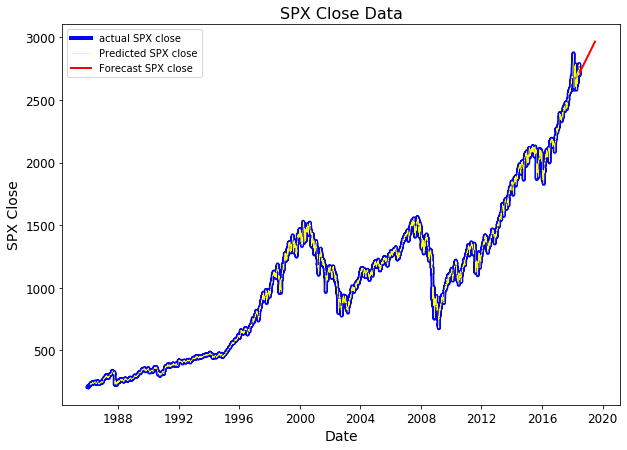

In [166]:
date=df.reindex(pred_close.index)
pred_close['date']=date.loc[pred_close.index,'date']
pred_close.loc[(max(df.index)+1):, 'date']= pd.to_datetime([max(df.date)+pd.Timedelta(days=i) for i in range(1,max_forecast +1)])
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df.date,df.close,c='blue',linewidth=4, label = 'actual SPX close')
ax.plot(pred_close.loc[0:len(df.close),'date'],pred_close.loc[0:len(df.close),'pred_close'],
       c='yellow',
        linewidth=0.5,
        label='Predicted SPX close'
       )
ax.plot(pred_close.loc[len(df.close):,'date'], pred_close.loc[len(df.close):,'pred_close'], label='Forecast SPX close', c='red',linewidth=2)
ax.set_title('SPX Close Data',fontsize=16)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('SPX Close',fontsize=14)
ax.tick_params(axis='both',labelsize=12)
ax.legend()
plt.show()

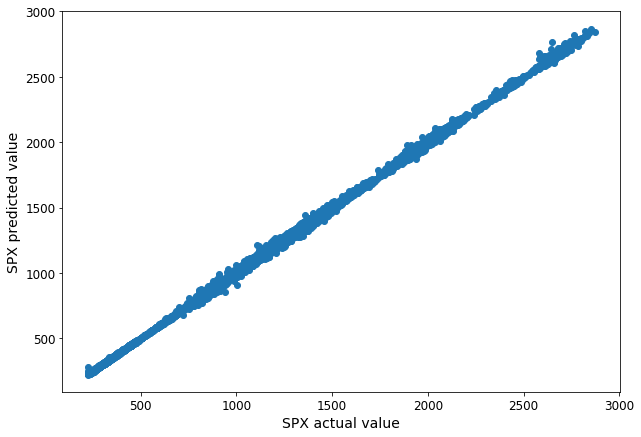

In [167]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(df.loc[max_lag:(df.shape[0] -1),'close'], pred_close.loc[max_lag:(df.shape[0]-1),'pred_close'])
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('SPX actual value', fontsize=14)
ax.set_ylabel('SPX predicted value',fontsize=14)
plt.show()



In [168]:
residuals = pd.DataFrame(
    {
        'date' :df.loc[max_lag:(df.shape[0]-1),'date'],
        'residual':df.loc[max_lag:(df.shape[0]-1),'close']- pred_close.loc[max_lag:(df.shape[0]-1),'pred_close']
    }
)
residuals.head()

,date,residual
36,1986-02-24,0.119290
37,1986-02-25,-0.391913
38,1986-02-26,-0.439016
39,1986-02-27,2.615926
40,1986-02-28,0.455737


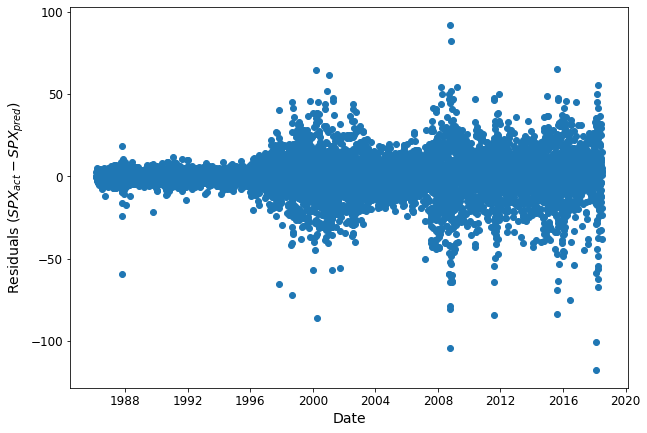

In [169]:
fig,ax = plt.subplots(figsize=(10,7))
ax.scatter(residuals.date,residuals.residual)
ax.tick_params(axis='both',labelsize=12)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Residuals ('+r'$SPX_{act} - SPX_{pred}$'+')',fontsize=14)
plt.show()

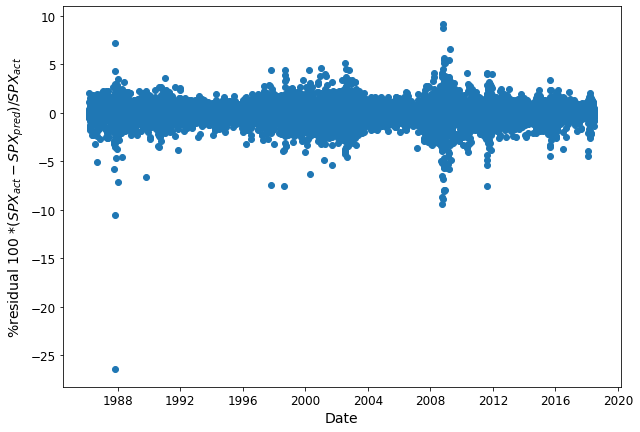

In [170]:
fig,ax = plt.subplots(figsize=(10,7))
pct_residuals= pd.DataFrame({
    'date':residuals.date,
    'pct_residual':residuals.residual/df.loc[max_lag:(df.shape[0]-1),'close'] * 100
})
ax.scatter(pct_residuals.date,pct_residuals.pct_residual)
ax.tick_params(axis='both',labelsize=12)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('%residual 100 *('+r"$SPX_{act}-SPX_{pred}$"+')/'+r'$SPX_{act}$',fontsize=14)
plt.show()


### Activity 

In [171]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [172]:
!ls

Activities-Chapter-4.ipynb     austin_weather-Copy1.csv
Chapter-4 Autoregression.ipynb spx-Copy1.csv


In [173]:
df = pd.read_csv('austin_weather-Copy1.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [175]:
df['Date']=pd.to_datetime(df.Date)
df = df.loc[:,['Date','TempAvgF']]
#df=df[['Date','TempAvgF']]
df.head()

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


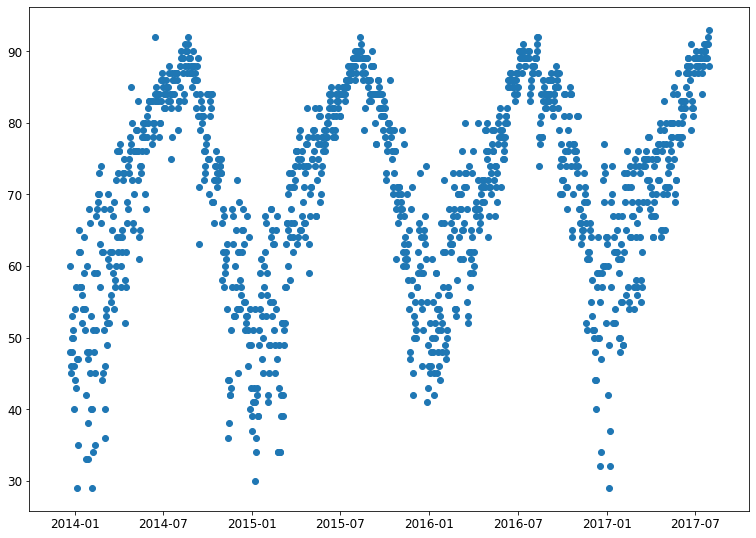

In [176]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
ax.scatter(df.Date, df.TempAvgF)
ax.tick_params(axis='both',labelsize=12)
plt.show()

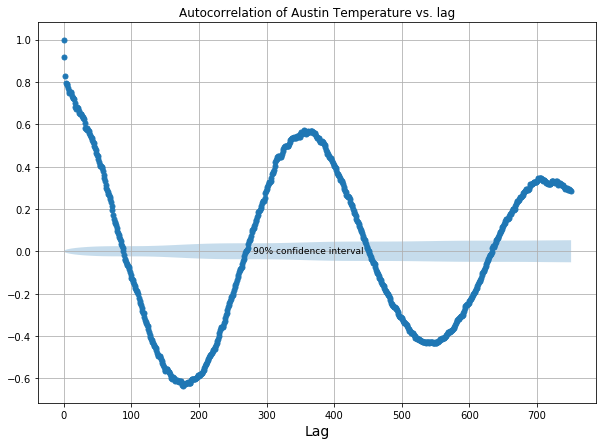

In [177]:
max_lag = 750
fig,ax = plt.subplots(figsize=(10,7))
acf_plot = plot_acf(x = df.TempAvgF,
                    ax = ax,
                    lags = max_lag, 
                    use_vlines = False,
                    alpha = 0.9,
                    title='Autocorrelation of Austin Temperature vs. lag',
                   )
ax.grid(True)
ax.text(280,-0.01,'90% confidence interval',fontsize=9)
ax.set_xlabel('Lag',fontsize=14)
plt.show()


In [178]:
corr0 = np.correlate(df.TempAvgF[0:]-df.TempAvgF.mean(),
                     df.TempAvgF[0:]-df.TempAvgF.mean(),
                     mode='valid'
                    )

corrs = [np.correlate(df.TempAvgF[0:(df.TempAvgF.shape[0]-i)] -df.TempAvgF.mean(),
                      df.TempAvgF[i:]-df.TempAvgF.mean(),
                      mode='valid'
                     )
         for i in range(max_lag)
        ]/corr0

In [179]:
def plot_lag_grid(series, corrs,axis_min,axis_max,
                  num_plots,total_lag, n_rows,n_cols
                 ):
    lag_step = int(total_lag/num_plots)
    fig = plt.figure(figsize=(10,7))
    for i in range(num_plots):
        lag = lag_step*i
        corr = corrs[lag]
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        ax.scatter(series,series.shift(lag))
        ax.set_xlim(axis_min,axis_max)
        ax.set_ylim(axis_min,axis_max)
        ax.set_title('lag='+str(lag))
        ax.text(axis_min+0.05*(axis_min-axis_max),
                axis_max - 0.05*(axis_min -axis_max),
                'correlation='+str(round(corr[0],3))
               )
    fig.tight_layout()
    plt.show()


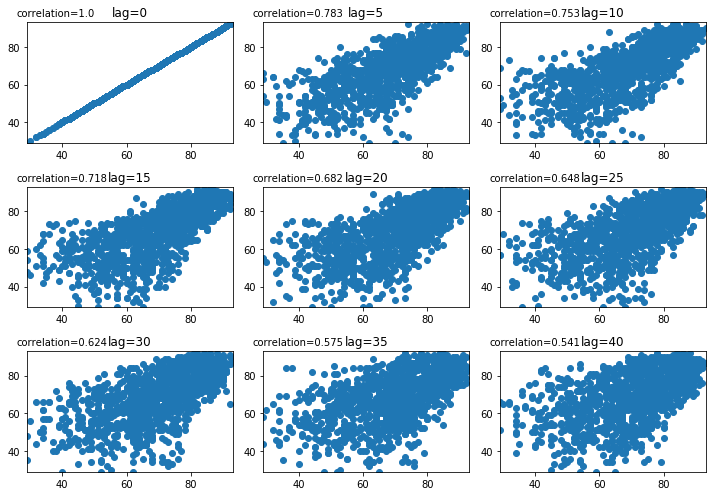

In [180]:
plot_lag_grid(series=df.TempAvgF,corrs=corrs,axis_min=df.TempAvgF.min(),axis_max=df.TempAvgF.max(),
              num_plots=9,total_lag=45,n_rows=3,n_cols=3
             )

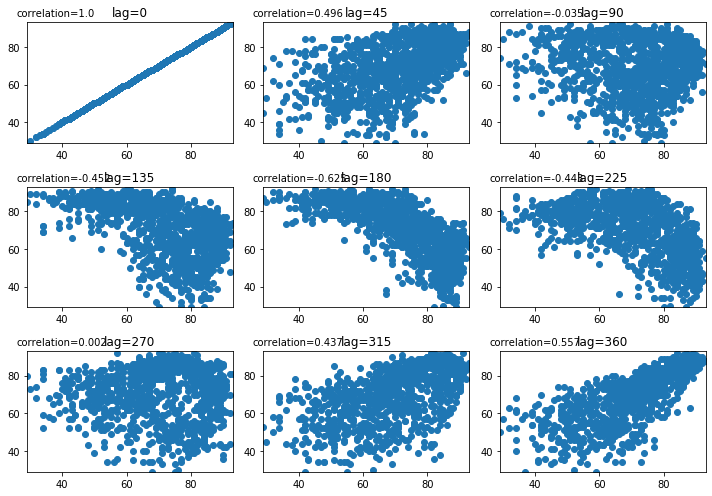

In [181]:
plot_lag_grid(series=df.TempAvgF,corrs=corrs,axis_min=df.TempAvgF.min(),axis_max=df.TempAvgF.max(),
              num_plots=9,total_lag=405,n_rows=3,n_cols=3
             )

In [182]:
model = AR(df.TempAvgF)
model_fit = model.fit()
max_lag = model_fit.k_ar
print('max lag= '+str(max_lag))
print('Coefficients: \n'+str(model_fit.params))


max lag= 23
Coefficients: 
const           1.909395
L1.TempAvgF     0.912076
L2.TempAvgF    -0.334043
L3.TempAvgF     0.157353
L4.TempAvgF     0.025721
L5.TempAvgF     0.041342
L6.TempAvgF     0.030831
L7.TempAvgF    -0.021230
L8.TempAvgF     0.020324
L9.TempAvgF     0.025147
L10.TempAvgF    0.059739
L11.TempAvgF   -0.017337
L12.TempAvgF    0.043553
L13.TempAvgF   -0.027795
L14.TempAvgF    0.053547
L15.TempAvgF    0.013070
L16.TempAvgF   -0.033157
L17.TempAvgF   -0.000072
L18.TempAvgF   -0.026307
L19.TempAvgF    0.025258
L20.TempAvgF    0.038341
L21.TempAvgF    0.007885
L22.TempAvgF   -0.008889
L23.TempAvgF   -0.011080
dtype: float64


/Users/manisha/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futu

In [183]:
max_forecast=365
pred_temp = pd.DataFrame({'pred_temp':
                         model_fit.predict(start=max_lag,
                                           end=df.shape[0]+max_forecast-1
                                          )})
pred_temp

,pred_temp
23,54.811719
24,56.890971
25,56.418916
26,50.986276
27,56.118435
...,...
1679,74.925609
1680,74.919686
1681,74.913813
1682,74.907990


In [184]:
date = df.reindex(pred_temp.index)
pred_temp['Date']=date['Date']
pred_temp.loc[(max(df.index)+1):,'Date']= pd.to_datetime([max(df.Date)+pd.Timedelta(days=i) for i in range(1,max_forecast+1)])


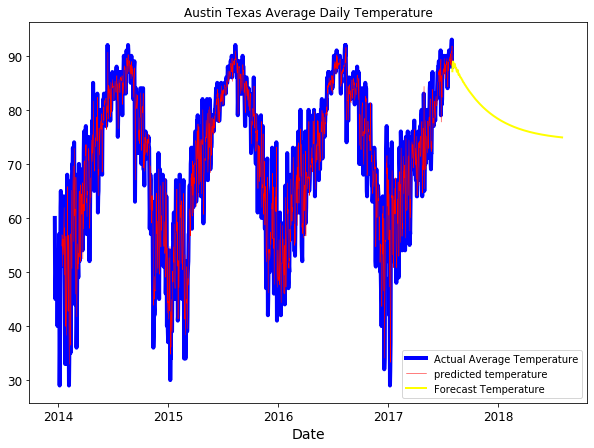

In [185]:
fig,ax= plt.subplots(figsize=(10,7))
ax.plot(df.Date,df.TempAvgF,c='blue',linewidth=4,label ='Actual Average Temperature')
ax.plot(pred_temp.loc[0:len(df.TempAvgF),'Date'], pred_temp.loc[0:len(df.TempAvgF),'pred_temp'],linewidth=0.5,c='red',label='predicted temperature')
ax.plot(pred_temp.loc[len(df.TempAvgF):,'Date'],pred_temp.loc[len(df.TempAvgF):,'pred_temp'],linewidth=2,c='yellow',label='Forecast Temperature')
ax.set_xlabel('Date',fontsize=14)
ax.set_title('Austin Texas Average Daily Temperature')
ax.tick_params(axis='both',labelsize=12)
ax.legend()
plt.show()

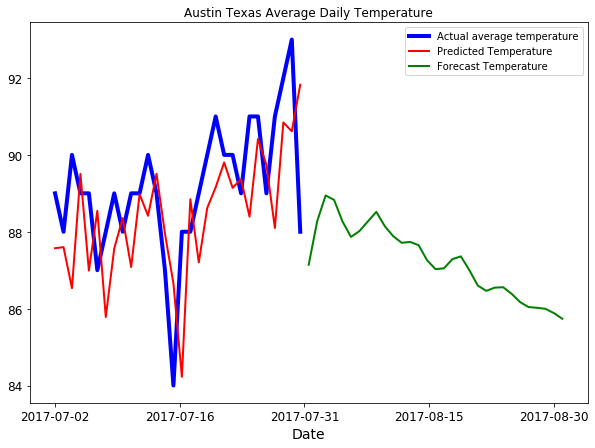

In [189]:
window=30
fig,ax =plt.subplots(figsize=(10,7))
#last 30 days of data
ax.plot(df.Date[(len(df.TempAvgF)-window) :len(df.TempAvgF)],
        df.TempAvgF[(len(df.TempAvgF)-window) :len(df.TempAvgF)],
        c='blue',
        linewidth=4,
        label='Actual average temperature'
       )
ax.plot(pred_temp.Date.iloc[(-max_forecast-window):(-max_forecast)],
        pred_temp.pred_temp.iloc[(-max_forecast-window):(-max_forecast)],
        c='red',
        linewidth=2,
        label='Predicted Temperature'
       )
#first 30 forecast values
ax.plot(pred_temp.loc[len(df.TempAvgF):len(df.TempAvgF)+window,'Date'],
        pred_temp.loc[len(df.TempAvgF):len(df.TempAvgF)+window,'pred_temp'],
        c='green',
        linewidth=2,
        label='Forecast Temperature'
       )
ax.set_xlabel('Date',fontsize=14)
ax.tick_params(axis='both',labelsize=12)
ax.set_title('Austin Texas Average Daily Temperature')
ax.set_xticks(pd.date_range(df.Date[len(df.TempAvgF)-window], df.Date[len(df.TempAvgF)-1]+pd.Timedelta(days=window),5))
ax.legend()
plt.show()

In [187]:
x=pred_temp.Date.iloc[(-max_forecast-window):(-max_forecast)]
x

1289   2017-07-02
1290   2017-07-03
1291   2017-07-04
1292   2017-07-05
1293   2017-07-06
1294   2017-07-07
1295   2017-07-08
1296   2017-07-09
1297   2017-07-10
1298   2017-07-11
1299   2017-07-12
1300   2017-07-13
1301   2017-07-14
1302   2017-07-15
1303   2017-07-16
1304   2017-07-17
1305   2017-07-18
1306   2017-07-19
1307   2017-07-20
1308   2017-07-21
1309   2017-07-22
1310   2017-07-23
1311   2017-07-24
1312   2017-07-25
1313   2017-07-26
1314   2017-07-27
1315   2017-07-28
1316   2017-07-29
1317   2017-07-30
1318   2017-07-31
Name: Date, dtype: datetime64[ns]

In [ ]:
y=df.Date[(len(df.TempAvgF)-window) :len(df.TempAvgF)]
y